#### Maestría en Inteligencia de Negocios y Análisis de Datos
#### Segundo Ciclo, Abril 2023
#### Proyecto Final -  Statistical Learning L
#### Marvin Chávez 08105031
#### Marvin Cordova 22007865

##### Notebook #3: Análisis de modelos, selección de mejor modelo yselección de mejor combinación de parámetros para cada tipo de modelo.

#### Menu
https://github.com/Marvin-Chavez/Statistical-Learning-L-ProyectoFinal/blob/main/Notebook%2301.ipynb

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("LoanDefault2.csv",sep=";")
df.head()

### 1. Análisis de Datos

#### 1.1 Extraer tipos de columnas: numéricas continuas, numéricas discretas y categóticas

In [4]:
def getDateColTypes(df):
       categoricas = []
       continuas = []
       discretas = []

       for colName in df.columns:
              if (df[colName].dtype == 'O'):
                     categoricas.append(colName)
              else:
                     if((df[colName].dtype == 'int64') or (df[colName].dtypes == 'float64')):
                            if(len(df[colName]) <= 30):
                                   discretas.append(colName)
                            else:
                                   continuas.append(colName)
       return discretas, continuas, categoricas

In [5]:
discretas, continuas, categoricas = getDateColTypes(df)

In [6]:
discretas

[]

In [7]:
continuas

['ID',
 'year',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

In [8]:
categoricas

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [9]:
#Se remueven de las variables continuas la columna objetivo, el año y el ID 
continuas.remove('Status')
continuas.remove('ID')
continuas.remove('year')

### 2. Balanceo de Categorías en el Target

In [13]:
df['Status'].value_counts()

0    112031
1     36439
Name: Status, dtype: int64

In [14]:
df_aldia = df[df['Status'] == 0]
df_aldia.shape

(112031, 34)

In [15]:
df_incumplimiento = df[df['Status'] == 1]
df_incumplimiento.shape

(36439, 34)

In [16]:
cantidadAlDia = 2*df_incumplimiento.shape[0]
cantidadAlDia

72878

In [17]:
df_aldia = df_aldia.sample(n=cantidadAlDia, random_state=2023)

In [18]:
df = pd.concat([df_incumplimiento, df_aldia])
df.shape

(109317, 34)

### 3. Ingeniería de Características

##### 3.1 Imputación de Variables

In [19]:

df.isnull().mean() #porcentaje

ID                           0.000000
year                         0.000000
loan_limit                   0.022513
Gender                       0.000000
approv_in_adv                0.006019
loan_type                    0.000000
loan_purpose                 0.000887
Credit_Worthiness            0.000000
open_credit                  0.000000
business_or_commercial       0.000000
loan_amount                  0.000000
rate_of_interest             0.333333
Interest_rate_spread         0.333333
Upfront_charges              0.352050
term                         0.000293
Neg_ammortization            0.000787
interest_only                0.000000
lump_sum_payment             0.000000
property_value               0.138103
construction_type            0.000000
occupancy_type               0.000000
Secured_by                   0.000000
total_units                  0.000000
income                       0.056807
credit_type                  0.000000
Credit_Score                 0.000000
co-applicant

In [20]:
cols_con_na = [col for col in df.columns if (df[col].isnull().mean() > 0)]
cols_con_na

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'LTV',
 'dtir1']

In [21]:
df[cols_con_na].dtypes

loan_limit               object
approv_in_adv            object
loan_purpose             object
rate_of_interest        float64
Interest_rate_spread    float64
Upfront_charges         float64
term                    float64
Neg_ammortization        object
property_value          float64
income                  float64
LTV                     float64
dtir1                   float64
dtype: object

In [22]:
prop_nan_per_col = df[cols_con_na].isnull().mean()
prop_nan_per_col

loan_limit              0.022513
approv_in_adv           0.006019
loan_purpose            0.000887
rate_of_interest        0.333333
Interest_rate_spread    0.333333
Upfront_charges         0.352050
term                    0.000293
Neg_ammortization       0.000787
property_value          0.138103
income                  0.056807
LTV                     0.138103
dtir1                   0.193995
dtype: float64

#####  Se procede a tratar de rescatar las variables que están por debajo de o igual a 0.05


In [23]:
cols_a_imputar = [col for col in cols_con_na if (df[col].isnull().mean() <= 0.05)]
cols_a_imputar

['loan_limit', 'approv_in_adv', 'loan_purpose', 'term', 'Neg_ammortization']

In [24]:
df[cols_a_imputar].dtypes

loan_limit            object
approv_in_adv         object
loan_purpose          object
term                 float64
Neg_ammortization     object
dtype: object

##### Imputación Continua

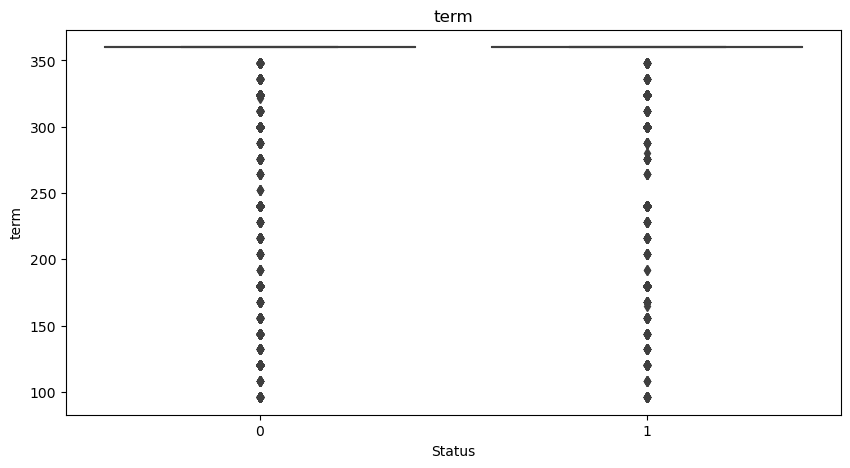

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Status'], y=df['term'])
plt.title('term')
plt.show()

#####  Debido a que la variable term se examinó en la exploración que no aporta de una manera significativa se descarta la variable. La concentracion de los datos esta al mismo nivel. 

##### Imputación Categórica

In [26]:
dataset_cat_missing = df[['Status','loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization']]
dataset_cat_missing.head()

,Status,loan_limit,approv_in_adv,loan_purpose,Neg_ammortization
0,1,cf,nopre,p3,not_neg
1,1,cf,nopre,p3,not_neg
2,1,cf,nopre,p3,not_neg
3,1,cf,nopre,p3,not_neg
4,1,cf,nopre,p3,not_neg


In [27]:
dataset_cat_missing.isnull().mean()

Status               0.000000
loan_limit           0.022513
approv_in_adv        0.006019
loan_purpose         0.000887
Neg_ammortization    0.000787
dtype: float64

In [28]:
for columna in ['loan_limit', 'approv_in_adv','loan_purpose','Neg_ammortization']:
    result = dataset_cat_missing[columna].value_counts() / len(dataset_cat_missing)
    print(result)

cf     0.908047
ncf    0.069440
Name: loan_limit, dtype: float64
nopre    0.839824
pre      0.154157
Name: approv_in_adv, dtype: float64
p3    0.378102
p4    0.366119
p1    0.231913
p2    0.022979
Name: loan_purpose, dtype: float64
not_neg    0.888828
neg_amm    0.110385
Name: Neg_ammortization, dtype: float64


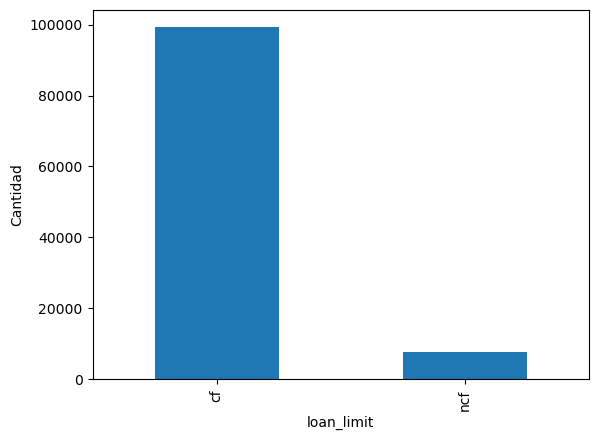

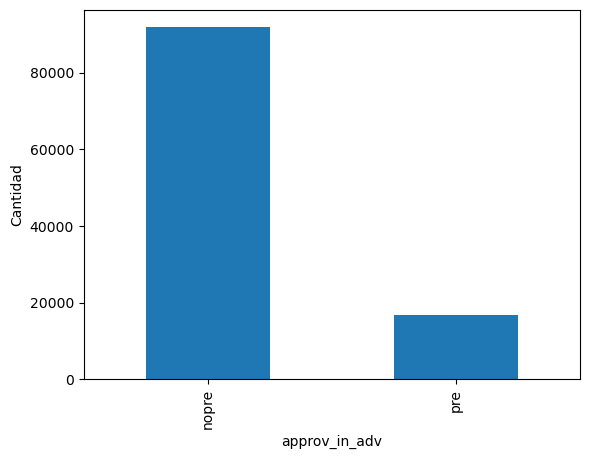

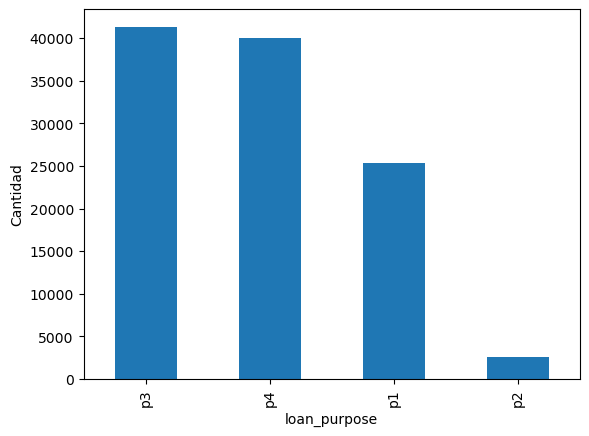

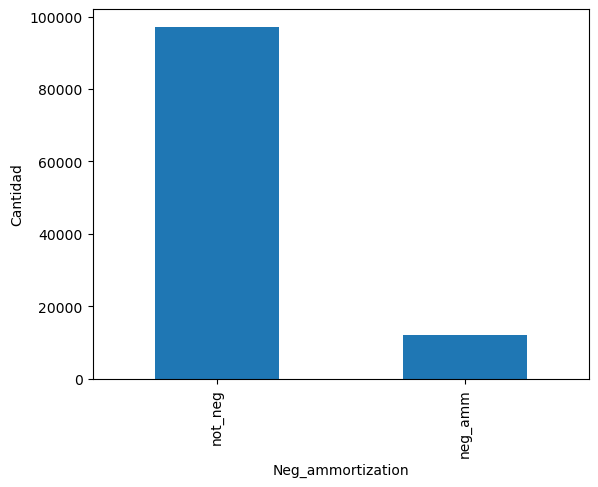

In [29]:
for columna in ['loan_limit', 'approv_in_adv','loan_purpose','Neg_ammortization']:
    dataset_cat_missing[columna].value_counts().plot.bar()
    plt.ylabel("Cantidad")
    plt.xlabel(columna)
    plt.show()

In [30]:

def plotCatColumn_vrs_Target(df, colname, target):
    categories = df[colname].unique()  
    categories = [category for category in categories if pd.notnull(category)]  
    colors = ['yellow', 'blue', 'green', 'red', 'orange', 'purple', 'pink', 'brown', 'gray', 'teal']  

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    subset_missing = df[df[colname].isnull()]
    if not subset_missing.empty:  
        subset_missing[target].plot(kind="kde", color="black", label="Missings")

    for i, category in enumerate(categories):
        subset = df[df[colname] == category]
        subset[target].plot(kind="kde", color=colors[i], label=category)

    ax.legend()
    plt.title(f'{colname} vs {target}')
    plt.show()


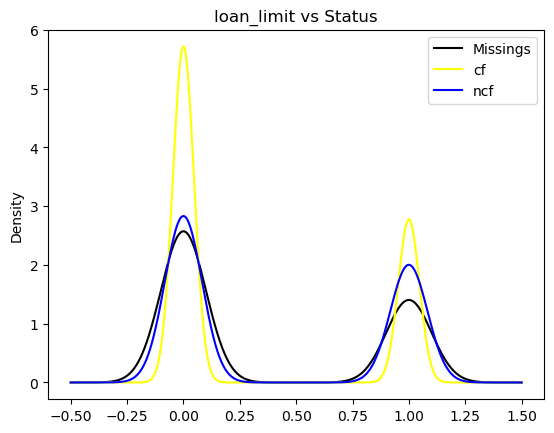

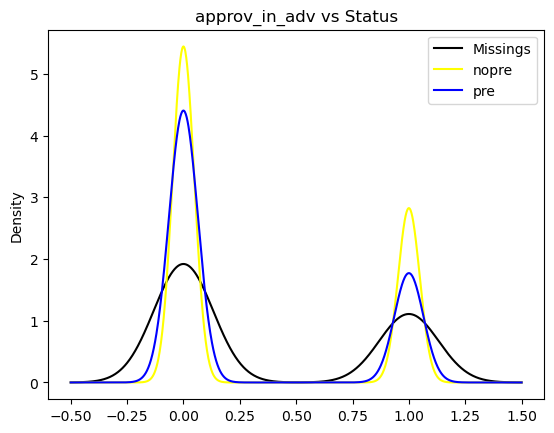

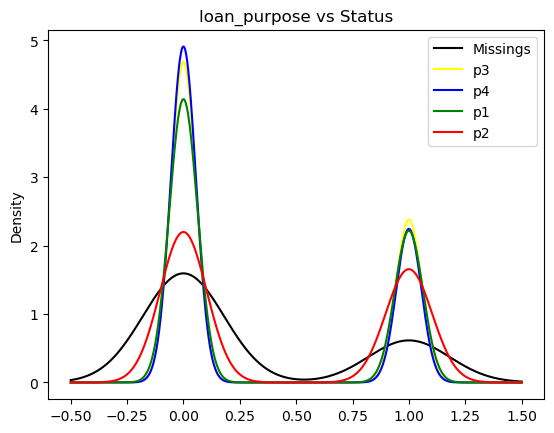

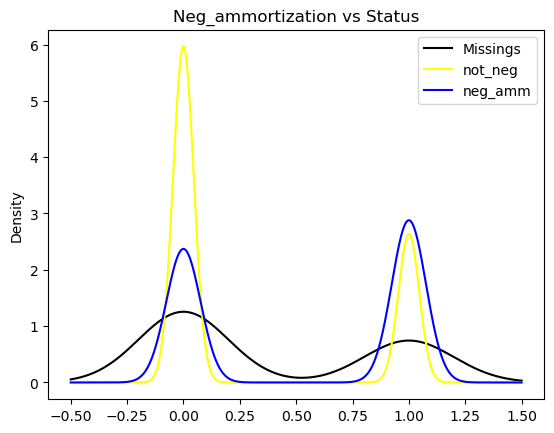

In [31]:
for catCol in  ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization']:
    plotCatColumn_vrs_Target(dataset_cat_missing, catCol, 'Status')

In [32]:
df['loan_limit'].fillna('ncf', inplace=True) 
df['approv_in_adv'].fillna('pre', inplace=True)
df['loan_purpose'].fillna('p2', inplace=True)
df['Neg_ammortization'].fillna('not_neg', inplace=True)

##### Verificación de la densidad despues de las imputaciones.

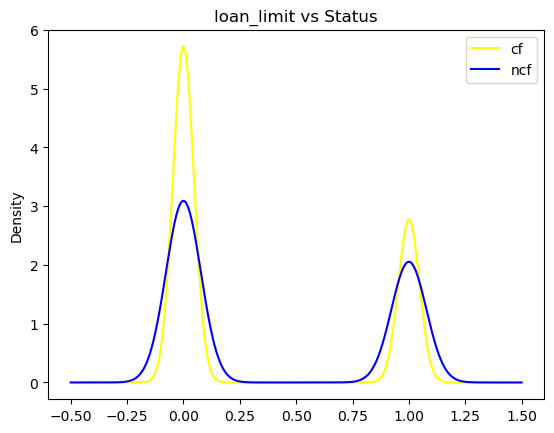

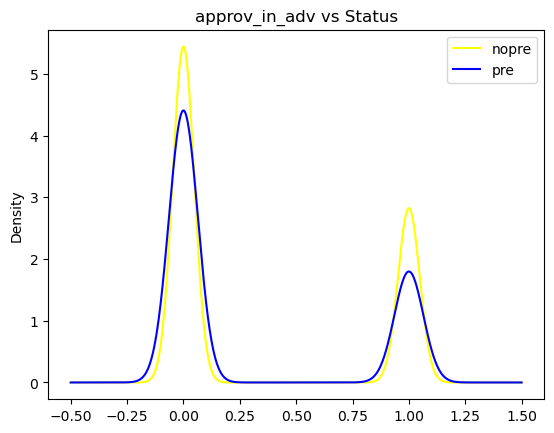

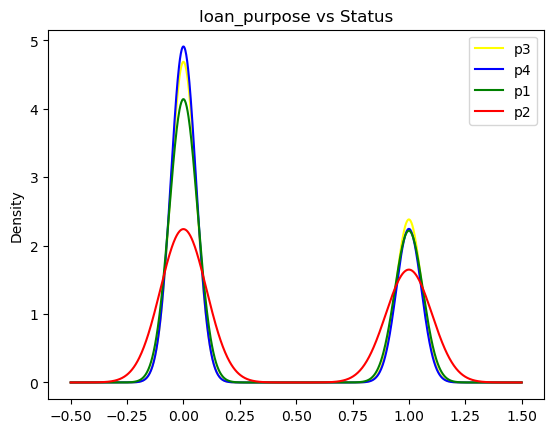

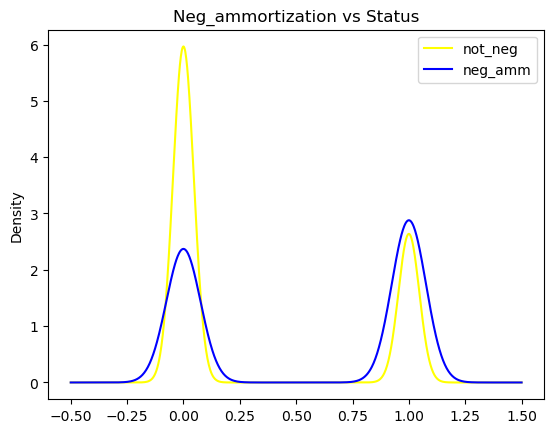

In [33]:
for catCol in  ['loan_limit', 'approv_in_adv', 'loan_purpose', 'Neg_ammortization']:
    plotCatColumn_vrs_Target(df, catCol, 'Status')

##### La modificación fue casi imperceptible, las gráficas mantienen su misma simetría.

In [34]:
Sobrevivientes = [col for col in df if (df[col].isnull().mean() <= 0.05)]
Sobrevivientes.remove('ID') #Identificador del caso
Sobrevivientes.remove('year') #Año todo es 2019
Sobrevivientes.remove('term') #La distribucion de los datos es la misma en el grafico de cajas.
Sobrevivientes.remove('Credit_Score') #La distribucion de los datos es la misma en el grafico de cajas.
Sobrevivientes


['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'loan_amount',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type',
 'Status']

##### 3.2 Codificación de Variables Categóricas

In [35]:
df[Sobrevivientes].dtypes


loan_limit                   object
Gender                       object
approv_in_adv                object
loan_type                    object
loan_purpose                 object
Credit_Worthiness            object
open_credit                  object
business_or_commercial       object
loan_amount                   int64
Neg_ammortization            object
interest_only                object
lump_sum_payment             object
construction_type            object
occupancy_type               object
Secured_by                   object
total_units                  object
credit_type                  object
co-applicant_credit_type     object
age                          object
submission_of_application    object
Region                       object
Security_Type                object
Status                        int64
dtype: object

In [36]:
codificar = Sobrevivientes
codificar.remove('loan_amount') #Continua
codificar.remove('Status') #Objetivo
codificar 

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [37]:
for catCol in codificar:
              freq_encoder_dict = df[catCol].value_counts().to_dict()
              df[catCol] = df[catCol].map(freq_encoder_dict)

In [38]:
Sobrevivientes = [col for col in df if (df[col].isnull().mean() <= 0.05)]
Sobrevivientes.remove('ID') #Identificador del caso
Sobrevivientes.remove('year') #Año todo es 2019
Sobrevivientes.remove('term') #La distribucion de los datos es la misma en el grafico de cajas.
Sobrevivientes.remove('Credit_Score') #La distribucion de los datos es la misma en el grafico de cajas.
Sobrevivientes

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'loan_amount',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type',
 'Status']

In [39]:
df[Sobrevivientes].dtypes

loan_limit                   int64
Gender                       int64
approv_in_adv                int64
loan_type                    int64
loan_purpose                 int64
Credit_Worthiness            int64
open_credit                  int64
business_or_commercial       int64
loan_amount                  int64
Neg_ammortization            int64
interest_only                int64
lump_sum_payment             int64
construction_type            int64
occupancy_type               int64
Secured_by                   int64
total_units                  int64
credit_type                  int64
co-applicant_credit_type     int64
age                          int64
submission_of_application    int64
Region                       int64
Security_Type                int64
Status                       int64
dtype: object

In [40]:
df[Sobrevivientes]

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,Neg_ammortization,...,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,99265,28068,91807,82591,41333,104461,108905,93472,106500,97250,...,101439,109284,107634,15098,56220,23914,71907,47392,109284,1
1,99265,28068,91807,82591,41333,104461,108905,93472,536500,97250,...,101439,109284,107634,15098,56220,15319,71907,47392,109284,1
2,99265,28068,91807,82591,41333,104461,108905,93472,726500,97250,...,101439,109284,107634,15098,56220,5429,71907,47392,109284,1
3,99265,28068,91807,82591,41333,104461,108905,93472,176500,97250,...,101439,109284,107634,15098,56220,24293,71907,47392,109284,1
4,99265,28068,91807,82591,41333,104461,108905,93472,76500,97250,...,101439,109284,107634,15098,56220,15319,71907,47392,109284,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60993,10052,28068,91807,82591,41333,104461,108905,93472,576500,97250,...,101439,109284,107634,33924,53097,24293,71907,47392,109284,0
54338,99265,29710,91807,82591,40023,104461,108905,93472,576500,97250,...,101439,109284,107634,31048,56220,24293,37410,6552,109284,0
69755,99265,31485,91807,82591,41333,104461,108905,93472,236500,97250,...,101439,109284,107634,33924,53097,23914,71907,54445,109284,0
64436,99265,28068,91807,82591,40023,104461,108905,93472,156500,97250,...,101439,109284,107634,31048,53097,24293,37410,47392,109284,0


##### 3.3 Outliers

In [41]:
import scipy.stats as stats

In [42]:

def plotDistBoxQQ(dataset, col):
     '''
     Descripcion: Muestra las graficas de Distribución, Boxplot y QQ-Plot para detectar Outliers 
     Input: dataset-> pandas dataframe, col->string con nombre de columna
     output: visualiuzación de plots.
     '''
     plt.figure(figsize=(20, 6))
     plt.subplot(1, 3, 1)
     sns.distplot(dataset[col], bins=30)
     plt.title("Histograma y Densisdad")

     plt.subplot(1, 3, 2)
     sns.boxplot(y=dataset[col])
     plt.title("Boxplot")

     plt.subplot(1, 3, 3)
     stats.probplot(dataset[col], dist="norm", plot=plt)
     plt.title("Q-Q Plot")

C:\Users\DAVID\AppData\Local\Temp\ipykernel_1676\580665193.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


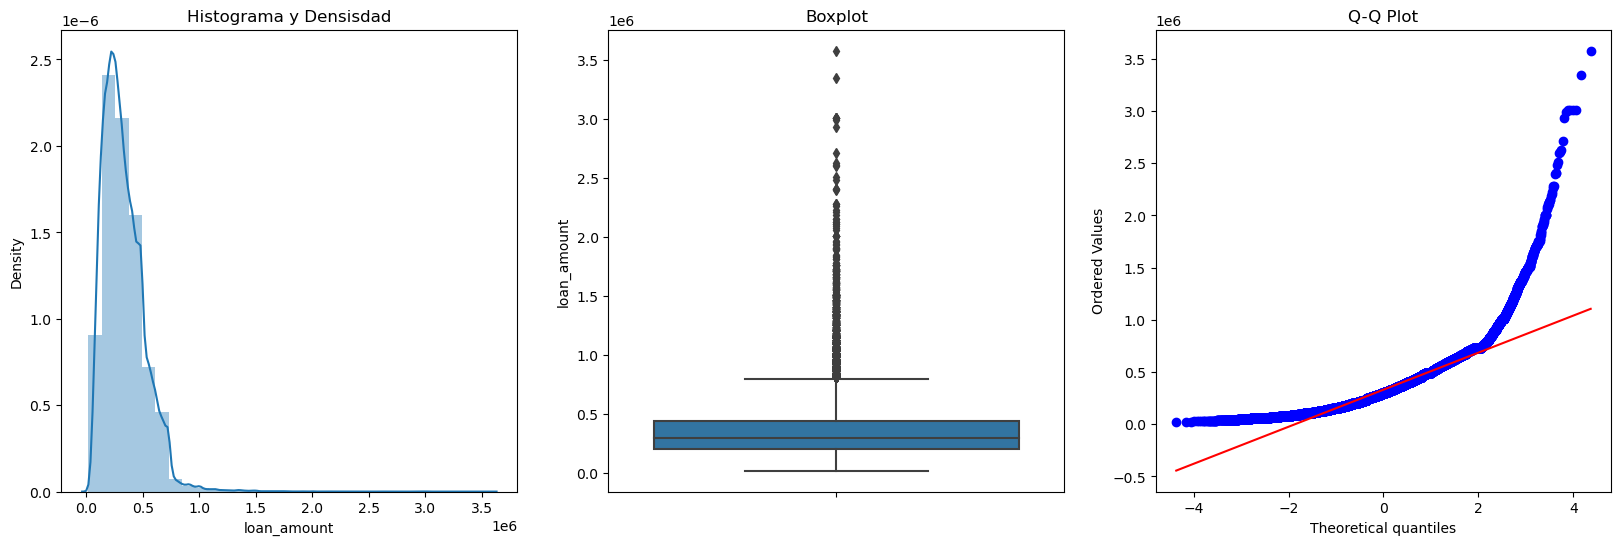

In [43]:
for col in ['loan_amount']:
     plotDistBoxQQ(df, col)

In [44]:
def detectOutliersLimits(dataset, col):
     '''
     Descripción: Calcula los limites superiores e inferiores para detección de outliers.
     Input: dataset-> pandas dataframe, col -> string nombre de columna
     Output: tupla de floats con los limites superior e inferior
     '''
     IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
     LI =  dataset[col].quantile(0.25) - (IQR*1.75)
     LS = dataset[col].quantile(0.75) + (IQR*1.75)

     return LI, LS

In [45]:
LI, LS = detectOutliersLimits(df, 'loan_amount')
LI, LS

(-223500.0, 856500.0)

In [46]:
LI, LS = detectOutliersLimits(df, 'loan_amount')
df['loan_amount'] = np.where(df['loan_amount']  > LS, LS, 
                                                                       np.where(df['loan_amount']  < LI, LI, df['loan_amount'] ))

C:\Users\DAVID\AppData\Local\Temp\ipykernel_1676\580665193.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], bins=30)


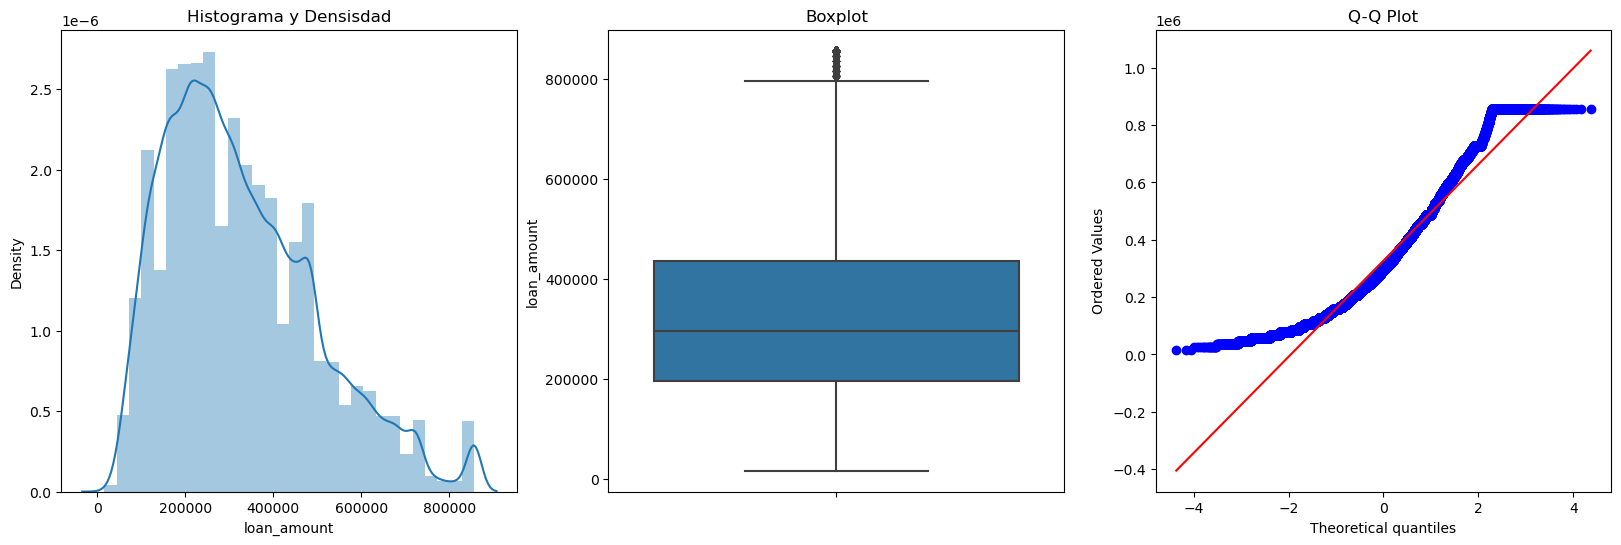

In [47]:
plotDistBoxQQ(df, 'loan_amount')

### 4. Construcción de Modelos

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [49]:
# seleccionamos predictores y target.
Sobrevivientes.remove('Status') #Objetivo
X = df[Sobrevivientes]
y = df['Status']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2023)

Scaler de datos

In [51]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

Regrisión Logística

In [52]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train_std, y_train)

logit_preds = logit.predict(X_test_std)
logit_preds

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [53]:
acc = round(accuracy_score(y_test, logit_preds), 5)
roc_auc = round(roc_auc_score(y_test, logit_preds), 5)

In [54]:
print(f"Accuracy: {acc}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.81123
ROC-AUC: 0.73624


#### a. Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold

naive_bayes = GaussianNB()

hyperparams_grid = {}

grid_search = GridSearchCV(estimator=naive_bayes, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs=-1, cv=KFold(n_splits=20, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc = np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParámetros: {grid_search.best_params_}')
print(f'Mejor Métrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')


Mejores HyperParámetros: {}
Mejor Métrica: 0.795490529187949
Mean Accuracy: 0.7361116047409041
Mean ROC_AUC: 0.795490529187949


In [68]:
from sklearn.metrics import confusion_matrix
y_pred = grid_search.predict(X_test_std)

confusion = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(confusion)

Matriz de Confusión:
[[21590   174]
 [ 8694  2338]]


#### b. LDA

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

hyperparams_grid = {}

grid_search = GridSearchCV(estimator=lda, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs=-1, cv=KFold(n_splits=20, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc = np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParámetros: {grid_search.best_params_}')
print(f'Mejor Métrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')


Mejores HyperParámetros: {}
Mejor Métrica: 0.7990260653054401
Mean Accuracy: 0.8186118325087477
Mean ROC_AUC: 0.7990260653054401


In [41]:
from sklearn.metrics import confusion_matrix
y_pred = grid_search.predict(X_test_std)

confusion = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(confusion)

Matriz de Confusión:
[[21323   441]
 [ 5698  5334]]


#### c. Regresión logística


In [196]:
from sklearn.model_selection import GridSearchCV, KFold

logit = LogisticRegression(solver='saga')
 
hyperparams_grid = {'penalty': ['l1', 'l2', 'elasticnet', None],
                                     'C': [0.01, 0.1, 1, 10],
                                     'fit_intercept': [True, False]
}

grid_search = GridSearchCV(estimator=logit, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs =-1, 
                                                                                     cv=KFold(n_splits=5, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc =  np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParámetros: {grid_search.best_params_}')
print(f'Mejor Métrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')

c:\Users\DAVID\.conda\envs\CienciaDatos\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DAVID\.conda\envs\CienciaDatos\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DAVID\.conda\envs\CienciaDatos\lib\site-packages\sklearn\linear_model\_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "c:\Users\DAVID\.conda\envs\CienciaDatos\lib\site-packages\sklearn\

Mejores HyperParámetros: {'C': 0.01, 'fit_intercept': True, 'penalty': 'l2'}
Mejor Métrica: 0.8008689957462647
Mean Accuracy: 0.8035768381015421
Mean ROC_AUC: 0.7946715241309663


In [199]:
y_pred = grid_search.predict(X_test_std)
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion)

Matriz de Confusión:
[[21031   733]
 [ 5440  5592]]


##### d. SVM

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold

svm = SVC()

hyperparams_grid = {
    'C': [0.01, 0.1, 1],
    #'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svm, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs=-1, cv=KFold(n_splits=2, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc = np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParámetros: {grid_search.best_params_}')
print(f'Mejor Métrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')


Mejores HyperParámetros: {'C': 0.1, 'gamma': 'auto'}
Mejor Métrica: 0.7946974452269775
Mean Accuracy: 0.8234994285382587
Mean ROC_AUC: 0.7940870986605043


In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
y_pred = grid_search.predict(X_test_std)
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion)

Matriz de Confusión:
[[21491   273]
 [ 5630  5402]]


#### e. Árboles de decisión

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


decision_tree = DecisionTreeClassifier()

hyperparams_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=decision_tree, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs=-1, cv=KFold(n_splits=4, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc = np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParámetros: {grid_search.best_params_}')
print(f'Mejor Métrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')

Mejores HyperParámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor Métrica: 0.8263166160421251
Mean Accuracy: 0.8091865050636726
Mean ROC_AUC: 0.7980308055471658


In [43]:
y_pred = grid_search.predict(X_test_std)
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion)

Matriz de Confusión:
[[21415   349]
 [ 5550  5482]]


#### d. Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

hyperparams_grid = {'n_estimators': [100],
                                    'criterion': ['gini', 'entropy', 'log_loss']
}
    
grid_search = GridSearchCV(estimator=random_forest, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs =-1, 
                                                                                     cv=KFold(n_splits=20, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc =  np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParámetros: {grid_search.best_params_}')
print(f'Mejor Métrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')

Mejores HyperParámetros: {'criterion': 'log_loss', 'n_estimators': 100}
Mejor Métrica: 0.8055322621876773
Mean Accuracy: 0.7929936437177303
Mean ROC_AUC: 0.8051740408307656


In [45]:
y_pred = grid_search.predict(X_test_std)
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion)

Matriz de Confusión:
[[19408  2356]
 [ 4667  6365]]


##### g. Análisis de discriminante linea

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, KFold

lda = LinearDiscriminantAnalysis()

hyperparams_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto'],
}

grid_search = GridSearchCV(estimator=lda, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs=-1, cv=KFold(n_splits=20, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc = np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParámetros: {grid_search.best_params_}')
print(f'Mejor Métrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')


c:\Users\DAVID\.conda\envs\CienciaDatos\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
31 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DAVID\.conda\envs\CienciaDatos\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DAVID\.conda\envs\CienciaDatos\lib\site-packages\sklearn\discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "c:\Users\DAVID\.conda\envs\CienciaDatos\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in _solve_eigen
    evals, e

Mejores HyperParámetros: {'shrinkage': None, 'solver': 'lsqr'}
Mejor Métrica: 0.798750810292755
Mean Accuracy: 0.8185072863855204
Mean ROC_AUC: 0.7985072535202022


In [62]:
y_pred = grid_search.predict(X_test_std)
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion)

Matriz de Confusión:
[[21319   445]
 [ 5687  5345]]


##### h. Análisis de discriminante cuadrático

In [46]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, KFold

qda = QuadraticDiscriminantAnalysis()

hyperparams_grid = {
    'reg_param': [0.0, 0.1, 0.2, 0.3],
}

grid_search = GridSearchCV(estimator=qda, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs=-1, cv=KFold(n_splits=20, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc = np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParámetros: {grid_search.best_params_}')
print(f'Mejor Métrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')


Mejores HyperParámetros: {'reg_param': 0.1}
Mejor Métrica: 0.8129356441427926
Mean Accuracy: 0.6979783392780626
Mean ROC_AUC: 0.7570727992254762


c:\Users\DAVID\.conda\envs\CienciaDatos\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [47]:
y_pred = grid_search.predict(X_test_std)
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion)

Matriz de Confusión:
[[21214   550]
 [ 5579  5453]]


##### i. AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix

adaboost = AdaBoostClassifier()

hyperparams_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(estimator=adaboost, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs=-1, cv=KFold(n_splits=20, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc = np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParámetros: {grid_search.best_params_}')
print(f'Mejor Métrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')


Mejores HyperParámetros: {'learning_rate': 1.0, 'n_estimators': 100}
Mejor Métrica: 0.8265129722384514
Mean Accuracy: 0.8205895403542469
Mean ROC_AUC: 0.8247173268661526


In [49]:
y_pred = grid_search.predict(X_test_std)
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(confusion)

Matriz de Confusión:
[[21223   541]
 [ 5500  5532]]


##### j. XGBooot

In [50]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix

xgboost = xgb.XGBClassifier()

hyperparams_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgboost, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', n_jobs=-1, cv=KFold(n_splits=10, shuffle=True, random_state=2023))
grid_search.fit(X_train_std, y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc = np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores HyperParámetros: {grid_search.best_params_}')
print(f'Mejor Métrica: {grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')

Mejores HyperParámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mejor Métrica: 0.841724357890663
Mean Accuracy: 0.8230681943382016
Mean ROC_AUC: 0.8320775226690154


In [51]:

y_pred = grid_search.predict(X_test_std)
confusion_mtx = confusion_matrix(y_test, y_pred)
print(confusion_mtx)

[[21269   495]
 [ 5307  5725]]


##### k. LGBM

In [63]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier()

hyperparams_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=hyperparams_grid, scoring=['roc_auc', 'accuracy'], refit='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
mean_accuracy = grid_search.cv_results_['mean_test_accuracy'].mean()
mean_roc_auc = grid_search.cv_results_['mean_test_roc_auc'].mean()

print(f"Mejores HyperParámetros: {best_params}")
print(f"Mejor Métrica: {best_score}")
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean ROC_AUC: {mean_roc_auc}")

Mejores HyperParámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Mejor Métrica: 0.8417210284271397
Mean Accuracy: 0.8259514424364144
Mean ROC_AUC: 0.8336185344852823


In [54]:
y_pred = grid_search.predict(X_test_std)
confusion_mtx = confusion_matrix(y_test, y_pred)
print(confusion_mtx)

[[    0 21764]
 [    0 11032]]


####  El mejor modelo y con el que se construirán los Pipeline y el Scrip es j. XGBooot por tener altos stats y una buena matriz de confusión en comparación a los demás modelos. La otra candidata era Naive Bayes con algo simple pero su ROC AUC era un poco mas bajo pero tenía una buena matriz de confusión. Es probable que otro modelo fuera el seleccionado pero se tiene un alto consumo de computo para mejorar los stats y no tiene mayor beneficio. 